# Paper Experiments
In this notebook, we plot paper experiments.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [1]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

Let's plot the experiment.

In [2]:
from src.utils import load_dataset

In [3]:
dataset = "PAMAP"
df_data = load_dataset(dataset)

In [5]:
selection = 63
converters = dict([(column, eval) for column in ["profile", "true_cps", "found_cps"]])
algorithms = ["ClaSS", "FLOSS", "Window"]

records = []

for algorithm in algorithms:
    df_profiles = pd.read_csv(f"../experiments/competitor_{dataset}/{algorithm}.csv", converters=converters)
    row = df_profiles.iloc[selection,:]
    records.append((algorithm, np.array(row.profile), np.array(row.found_cps)))

In [14]:
ts_name = df_data["name"].iloc[selection]
ts = df_data.time_series.iloc[selection]
true_cps = df_data.change_points.iloc[selection]

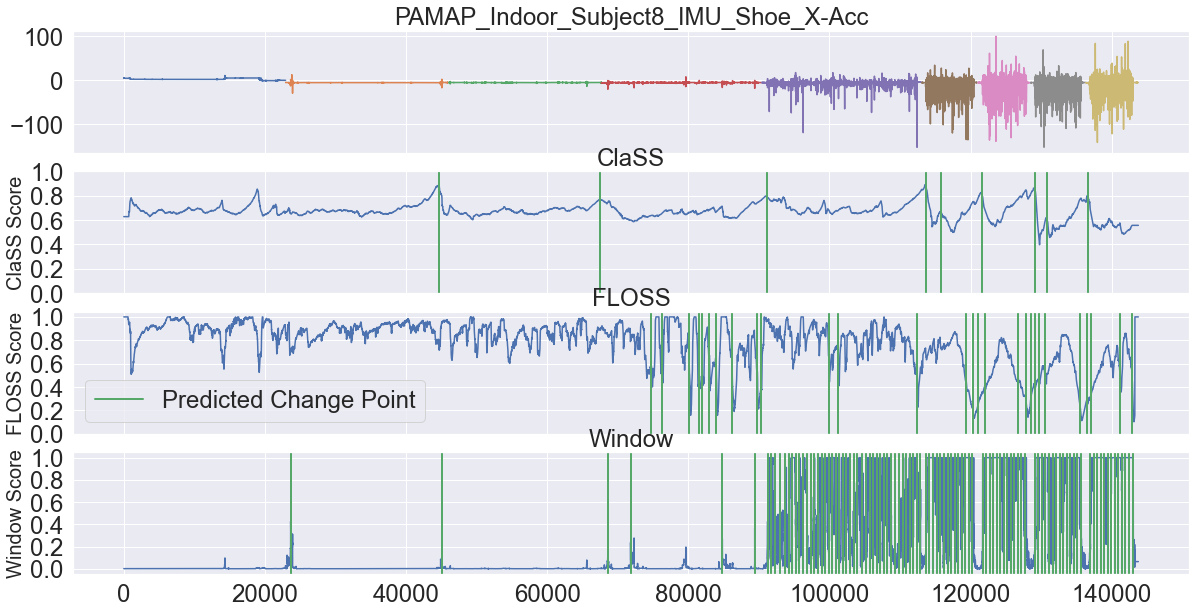

In [34]:
fontsize = 24

fig, axes = plt.subplots(
    4,  
    sharex=True, 
    gridspec_kw={'hspace': .15}, 
    figsize=(20,5 * 2)
)

axes[0].set_title(ts_name, fontsize=fontsize)

segments = [0] + true_cps.tolist() + [len(ts)]

for idx in np.arange(0, len(segments)-1):
    axes[0].plot(np.arange(segments[idx], segments[idx+1]), ts[segments[idx]:segments[idx+1]])

for ax, (algorithm, profile, found_cps) in zip(axes[1:], records):
    ax.set_title(algorithm, fontsize=fontsize)
    ax.plot(np.arange(profile.shape[0]), np.clip(profile, 0, 1), color='b')

    for idx, found_cp in enumerate(found_cps):
        ax.axvline(x=found_cp, linewidth=2, color='g', label='Predicted Change Point' if idx == 0 else None)
        
    ax.set_ylabel(f"{algorithm} Score", fontsize=fontsize-4)
    
    ax.set_yticks(np.arange(0,1+.2,.2))
    
axes[2].legend(prop={'size': fontsize})

for ax in axes:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)

plt.savefig(f"../figures/comparative_detection_usecase.pdf", bbox_inches="tight")   